# ADMN5016 Machine Learning Application

# Cart Abandonment Prediction Model

## Import Libraries

In [2]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Dataset

In [3]:
cart_df = pd.read_csv("C:/Users/bista/Downloads/data_cart_abandonment.csv")

In [7]:
cart_df.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                object
dtype: object

In [5]:
cart_df.Cart_Abandoned=cart_df.Cart_Abandoned.astype(str)

In [6]:
#Initial columns and rows of the dataset
cart_df.head()


,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [14]:
#Final columns and rows of the dataset
cart_df.tail()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
4279,Session_ID_4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,Session_ID_4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,Session_ID_4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,Session_ID_4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1
4283,Session_ID_4283,No,31,4.0,0,3.0,0,1,7,0,1,1,1


In [8]:
#Description of the data in the dataframe 
cart_df.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000


### Countplot of Cart Abandoned

C:\Users\bista\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cart_Abandoned', ylabel='count'>

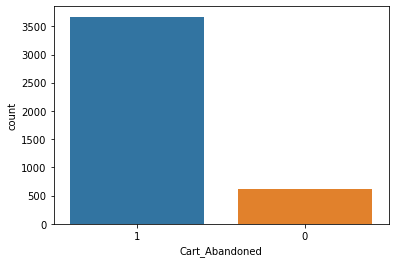

In [9]:
sns.countplot(cart_df.Cart_Abandoned)

## Exploratory Data Analysis


### Univariate Analysis

In [10]:
num = cart_df.select_dtypes(include=["float64","int64"])
cat = cart_df.select_dtypes(include=["object","category"]).drop(["Is_Product_Details_viewed","ID"],axis=1)

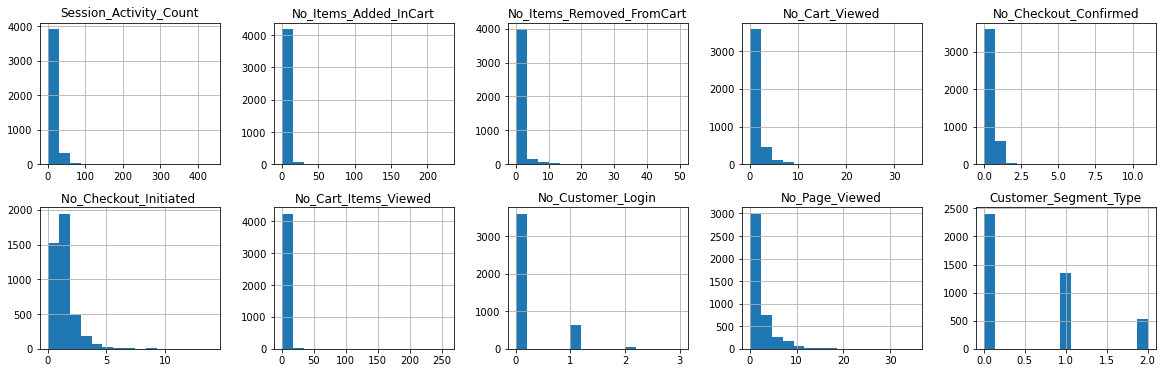

In [12]:
num.hist(bins=15, figsize=(20, 6), layout=(2, 5));

In [11]:
cat

,Cart_Abandoned
0,1
1,1
2,0
3,1
4,1
...,...
4279,1
4280,1
4281,1
4282,1


### Bivariate Analysis

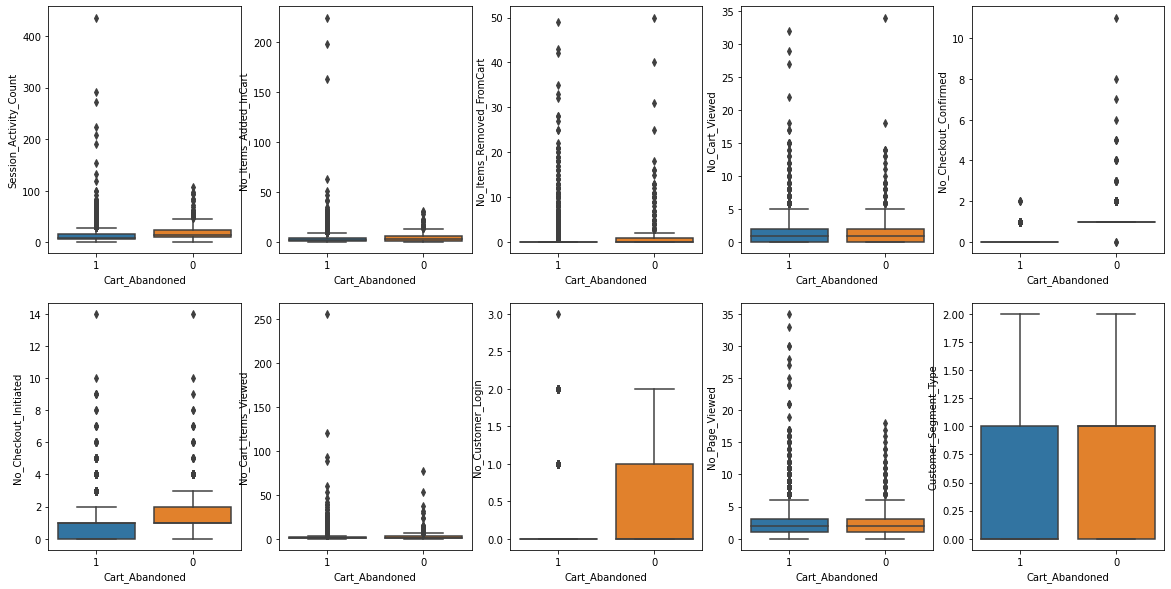

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

<AxesSubplot:xlabel='Is_Product_Details_viewed', ylabel='count'>

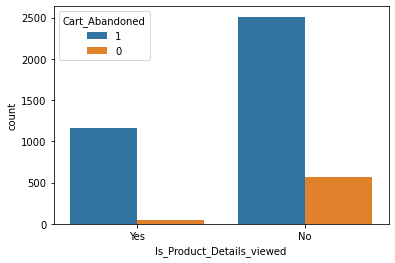

In [14]:
sns.countplot(x=cart_df.Is_Product_Details_viewed,hue=cart_df.Cart_Abandoned)

### Correlation plot of Independent attributes

<AxesSubplot:>

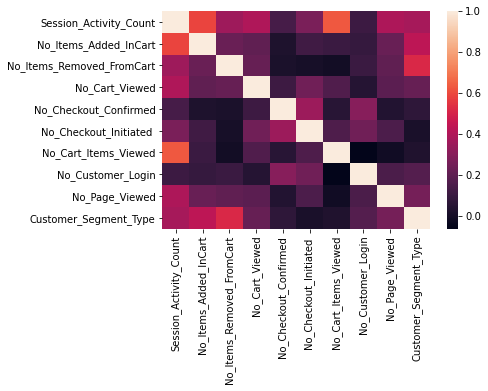

In [15]:
corr = num.corr()
sns.heatmap(corr)

# Data Pre-Processing

In [18]:
cart_df.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

### Imputing Missing Values with Mean

In [17]:
cart_df['No_Items_Added_InCart'] = cart_df['No_Items_Added_InCart'].fillna(cart_df['No_Items_Added_InCart'].mean())
cart_df['No_Cart_Viewed'] = cart_df['No_Cart_Viewed'].fillna(cart_df['No_Cart_Viewed'].mean())

### Scaling Of Data: By MinMax Scaling

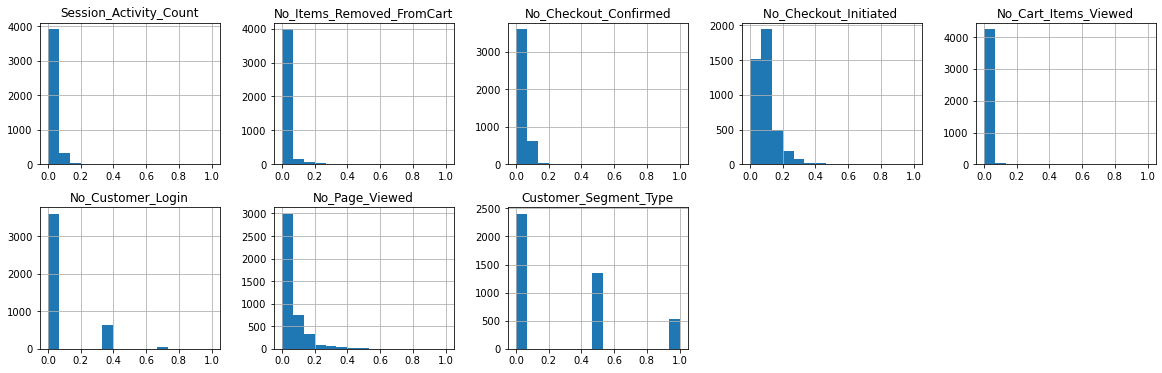

In [19]:
num=cart_df.select_dtypes(include=["int64"])
cat=cart_df.select_dtypes(include=["object","category"]).drop(["Is_Product_Details_viewed","ID"],axis=1)
min_max_scaler = MinMaxScaler()
x_scaled= min_max_scaler.fit_transform(num)
x_scaled
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head(3)
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5));

In [20]:
df_scaled["ID"]=cart_df.ID
df_scaled.set_index('ID',inplace=True)
df_scaled.reset_index(inplace=True)
df_final=df_scaled.join(cat)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Removed_FromCart,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,0.009174,0.0,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1
1,Session_ID_1,0.087156,0.0,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1
2,Session_ID_2,0.018349,0.0,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0


## Feature Selection

In [21]:
X=df_final.iloc[:,1:12]
X.shape
y= df_final["Cart_Abandoned"]
y.name
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [22]:
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=7, verbose = 3 )
fit=rfe.fit(X,y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Num Features: 7
Selected Features: [ True False  True  True False  True  True  True  True]
Feature Ranking: [1 3 1 1 2 1 1 1 1]


In [23]:
l = [i for i,x in enumerate(list(fit.support_)) if x == True]
X.columns

Index(['Session_Activity_Count', 'No_Items_Removed_FromCart',
       'No_Checkout_Confirmed', 'No_Checkout_Initiated ',
       'No_Cart_Items_Viewed', 'No_Customer_Login', 'No_Page_Viewed',
       'Customer_Segment_Type', 'Cart_Abandoned'],
      dtype='object')

In [24]:
feature_selected = [X[X.columns[l[i]]].name for i,x in enumerate(l)]
feature_selected

['Session_Activity_Count',
 'No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Customer_Segment_Type',
 'Cart_Abandoned']

In [25]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})
feature_weightage_dict

{'Session_Activity_Count': 0.007640535015143668,
 'No_Items_Removed_FromCart': 0.0007943490449344908,
 'No_Checkout_Confirmed': 0.3521017492028851,
 'No_Checkout_Initiated ': 0.016801785367553022,
 'No_Cart_Items_Viewed': 0.0016062609462102685,
 'No_Customer_Login': 0.030103144057055057,
 'No_Page_Viewed': 0.0021715787235969328,
 'Customer_Segment_Type': 0.0008826047736588292,
 'Cart_Abandoned': 0.5878979928689626}

In [27]:
sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)
sorted_feature_weightage_dict

[('Cart_Abandoned', 0.5878979928689626),
 ('No_Checkout_Confirmed', 0.3521017492028851),
 ('No_Customer_Login', 0.030103144057055057),
 ('No_Checkout_Initiated ', 0.016801785367553022),
 ('Session_Activity_Count', 0.007640535015143668),
 ('No_Page_Viewed', 0.0021715787235969328),
 ('No_Cart_Items_Viewed', 0.0016062609462102685),
 ('Customer_Segment_Type', 0.0008826047736588292),
 ('No_Items_Removed_FromCart', 0.0007943490449344908)]

In [28]:
df_final

,ID,Session_Activity_Count,No_Items_Removed_FromCart,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,0.009174,0.00,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1
1,Session_ID_1,0.087156,0.00,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1
2,Session_ID_2,0.018349,0.00,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0
3,Session_ID_3,0.013761,0.00,0.000000,0.000000,0.015625,0.0,0.000000,0.0,1
4,Session_ID_4,0.071101,0.24,0.000000,0.000000,0.015625,0.0,0.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...
4279,Session_ID_4279,0.052752,0.12,0.000000,0.000000,0.011719,0.0,0.200000,1.0,1
4280,Session_ID_4280,0.016055,0.00,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1
4281,Session_ID_4281,0.009174,0.00,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1
4282,Session_ID_4282,0.018349,0.00,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1


#### Now comparing both the models we can see the No_Items_Added_InCart, No_Checkout_Confirmed, No_Checkout_Initiated, No_Customer_Login and No_Page_Viewed has the higher feature importance. So we will only consider these features to train our model.

### Creating Train & Test Sets

In [29]:
X = df_final.drop(['Cart_Abandoned','ID','Session_Activity_Count','No_Items_Removed_FromCart','No_Cart_Items_Viewed','Customer_Segment_Type' ], axis = 1)
y = df_final['Cart_Abandoned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [30]:
# from sklearn.model_selection we are importing train_test_split for splitting data into training and testing data.
# from sklearn.metrics we are importing accuracy_score , roc_auc_score , confusion_matrix 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix

In [31]:
print("the shapes of x-train and x-test are : " , X_train.shape , X_test.shape)
print("the shapes of y-train and y-test are : " , y_train.shape , y_test.shape)

the shapes of x-train and x-test are :  (2570, 4) (1714, 4)
the shapes of y-train and y-test are :  (2570,) (1714,)


Text(0.5, 1.0, 'Correlation HeatMap')

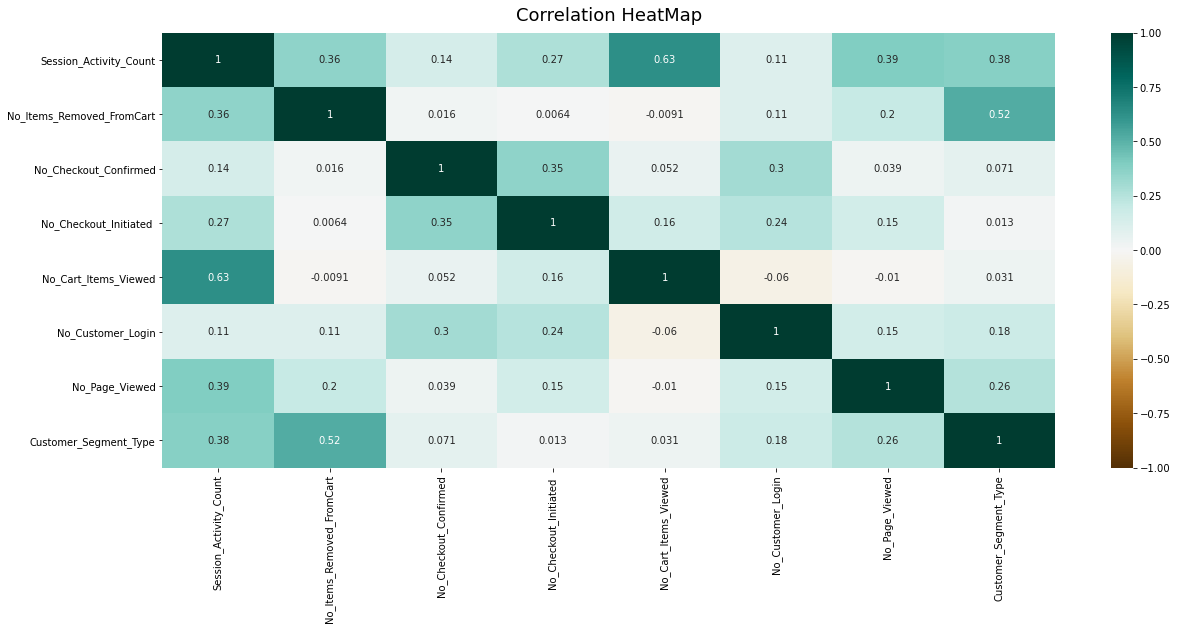

In [32]:
# correlation heatmap

plt.figure(figsize=(20,8))
heatmap = sns.heatmap(df_final.corr() , vmin=-1 , vmax=1 ,annot=True , cmap='BrBG')
heatmap.set_title('Correlation HeatMap' , fontdict = {'fontsize' : 18} , pad=12)

## Building ML Models

### Decision Tree Classifier

In [33]:
# importing DecisionTreeClassifier
# creates the classification model by building a decision tree.

from sklearn.tree import DecisionTreeClassifier , plot_tree

In [34]:
dt_clf = DecisionTreeClassifier()

In [35]:
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [36]:
y_preds_dt = dt_clf.predict(X_test)

In [184]:
print("Accuracy Score of the Decision Tree Model" , accuracy_score(y_test , y_preds_dt))
print("ROC AUC score of the Decision Tree Model is : " , roc_auc_score(y_test , y_preds_dt))

Accuracy Score of the Decision Tree Model 0.9807467911318553
ROC AUC score of the Decision Tree Model is :  0.9802302888368463


#### Here, the Accuracy Score of the Decision Tree Model = 0.97

Text(0.5, 1.0, 'Confusin Matrix Of Decision Tree Model')

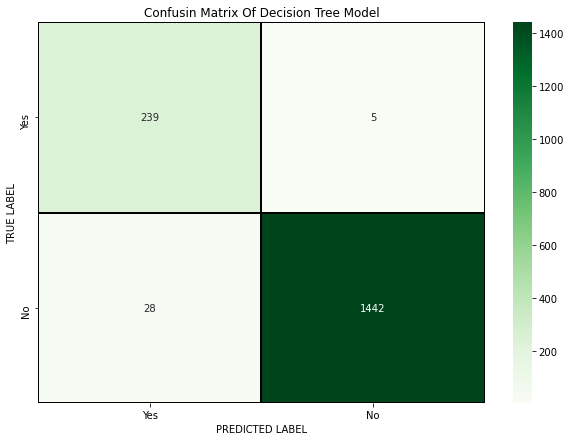

In [37]:
#confusion Matrix of Decision Tree Model 
cm  = confusion_matrix(y_test , y_preds_dt)

x_axis_labels = ["Yes" , "No"]
y_axis_labels = ["Yes" , "No"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm , annot=True, linewidths=0.2 , linecolor="black" , fmt=".0f" , ax=ax , cmap="Greens" , 
           xticklabels=x_axis_labels , yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusin Matrix Of Decision Tree Model")

In [38]:
# importing RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier from sklearn.ensemble

# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# An extra-trees classifier implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

# AdaBoostClassifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier

In [39]:
rf_clf = RandomForestClassifier(n_estimators=100)
extratree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [40]:
rf_clf.fit(X_train , y_train)
extratree_clf.fit(X_train , y_train)
bg_clf.fit(X_train , y_train)
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100)

In [41]:
y_preds_rf = rf_clf.predict(X_test)
y_preds_et = extratree_clf.predict(X_test)
y_preds_bg = bg_clf.predict(X_test)
y_preds_ada = ada_clf.predict(X_test)

In [42]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.9813302217036173
Accuracy Score of the Extre Tree Classifier Model 0.9801633605600933
Accuracy Score of the Bagging Classifier Model 0.9801633605600933
Accuracy Score of the AdaBoost Classifier Model 0.9813302217036173


In [43]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.980570424891268
ROC AUC Score of the Extre Tree Classifier Model 0.9781811085089774
ROC AUC Score of the Bagging Classifier Model 0.9747630199620831
ROC AUC Score of the AdaBoost Classifier Model 0.9822794691647151


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

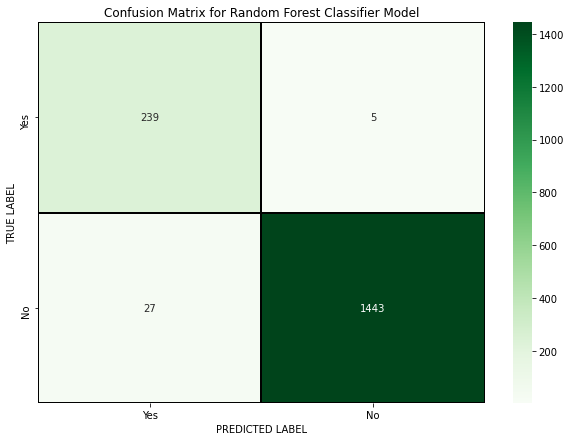

In [45]:
#Confusion Matrix of Random Forest Classifier Model.
cm = confusion_matrix(y_test, y_preds_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

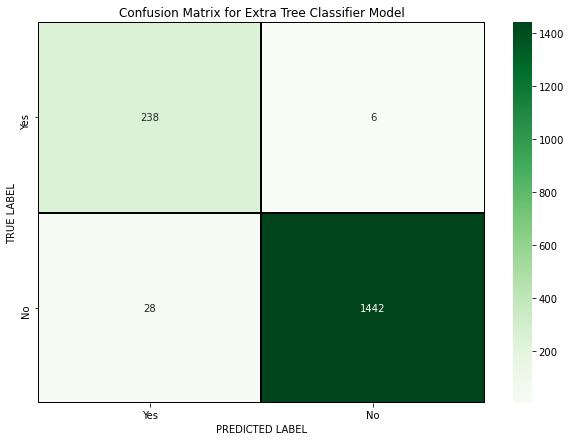

In [46]:
#Confusion Matrix of Extra Tree Classifier Model.
cm = confusion_matrix(y_test, y_preds_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

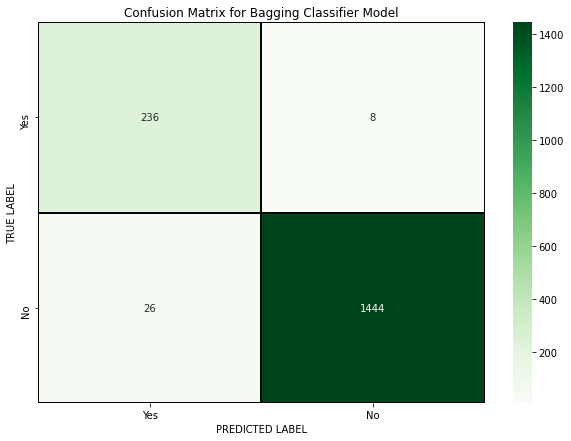

In [47]:
#Confusion Matrix of Bagging Classifier Model.
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

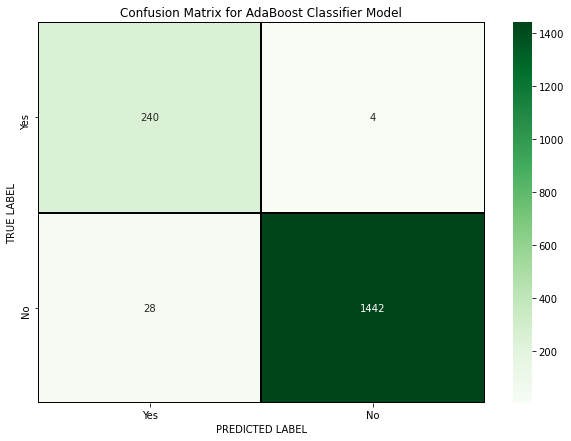

In [48]:
#Confusion Matrix of AdaBoost Classifier Model.
cm = confusion_matrix(y_test, y_preds_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

## LGBM Classifier-Hyperparameter tuning

In [49]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [50]:
# importing LGBMClassifier from lightgbm

# Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm

from lightgbm import LGBMClassifier

In [51]:
lgbm_clf = LGBMClassifier()

In [52]:
lgbm_clf.fit(X_train , y_train)

LGBMClassifier()

In [53]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [54]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_preds_lgbm))
print("ROC AUC Score of the LGBM Model", roc_auc_score(y_test, y_preds_lgbm))

Accuracy Score of the LGBM Model 0.9801633605600933
ROC AUC Score of the LGBM Model 0.9781811085089774


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

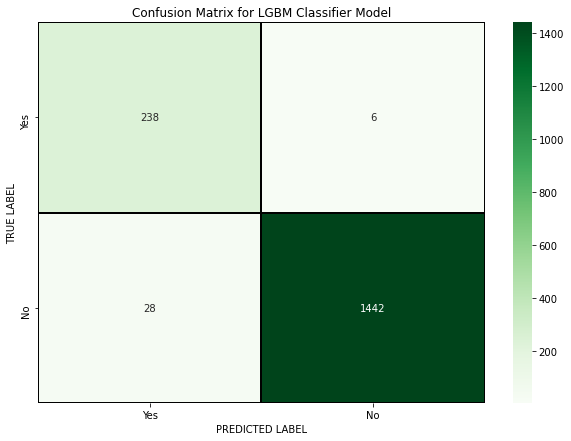

In [55]:
#Confusion Matrix of LGBM Classifier Model.
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

In [56]:
pip install logmodel

In [57]:
# importing classification_report from sklearn.metrics

from sklearn.metrics import classification_report

In [58]:
# classification report based on LGBMClassifier result 

print("Model Classification Report:")

print(classification_report(y_test,y_preds_lgbm))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       244
           1       1.00      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.98      0.96      1714
weighted avg       0.98      0.98      0.98      1714



In [59]:
# classification report based on AdaBoost Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_ada))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       244
           1       1.00      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.98      0.96      1714
weighted avg       0.98      0.98      0.98      1714



In [60]:
# classification report based on Bagging Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_bg))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       244
           1       0.99      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.97      0.96      1714
weighted avg       0.98      0.98      0.98      1714



In [61]:
# classification report based on Extra Tree Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_et))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       244
           1       1.00      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.98      0.96      1714
weighted avg       0.98      0.98      0.98      1714



In [62]:
# classification report based on Random Forest Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_rf))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       244
           1       1.00      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.98      0.96      1714
weighted avg       0.98      0.98      0.98      1714



In [63]:
# classification report based on Decision Tree Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_dt))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       244
           1       1.00      0.98      0.99      1470

    accuracy                           0.98      1714
   macro avg       0.95      0.98      0.96      1714
weighted avg       0.98      0.98      0.98      1714



## PREDICTED VALUES - RANDOM FOREST CLASSIFIER 

In [64]:
# importing necessary packages
import sqlite3
import json
import codecs

In [173]:
conn = sqlite3.connect('cart_abandonment_predict.db')

In [65]:
prediction = print(y_test,y_preds_rf)

794     1
485     1
3235    1
3609    1
683     1
       ..
1355    1
850     1
1462    0
135     1
2597    1
Name: Cart_Abandoned, Length: 1714, dtype: object ['1' '1' '1' ... '0' '1' '1']


## Dump model to pickle file

In [66]:
rf_clf.predict(X_test)

array(['1', '1', '1', ..., '0', '1', '1'], dtype=object)

In [67]:
pkl_out = open("train_classifier","wb")
pkl.dump(rf_clf,pkl_out)